# Random Forest
Today we're going to look at a more powerful method for classification and regression call Random Forest. Random Forest is a supervised learning method in a class of models known as ensemble models. An ensemble model use an aggregation of models in order to try and achieve better performance. 

The Random Forest model is a homogeneous ensemble model in that random forest aggregates only one kind of model - decision trees. We'll dive deeper into ensemble models when we have completed our tour of basic ML models and random forest, though an ensemble model in it's own right, is frequently used in higher level heterogeneous ensemble models.

Avik has a good infographic on Random Forest that you can review at:

https://github.com/Avik-Jain/100-Days-Of-ML-Code/blob/master/Code/Day%2034%20Random_Forest.md

## Importing the libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Importing the dataset

In [3]:
# read in the dataset, remember to modify the path name for your environment
#
# This dataset contains information on users in a social network. The data includes a user id, gender type,
# the age, and the estimated salary. A car company has just launched their brand new luxury SUV and they
# are trying to see which of these users of the social network are predicted to buy this brand new SUV.
# The last column indicates if the user bought this SUV (dependent variable). We are going to build a model 
# that is going to predict if a user is going to buy or not the SUV based on the age and the estimated salary
# independent variables. 
#
dataset = pd.read_csv('data/Social_Network_Ads.csv')
# let's take a quick look at the data attributes
print(dataset.head())
# set up the x using only the Age and EstimatedSalary attribute values
x = dataset.iloc[:,[2,3]].values
# set up the y with the Purchased attribute values
y = dataset.iloc[:, 4].values
# let's take a quick look at each data frame
print('shape of the full dataset looks like ', dataset.shape)
print('x looks like: ', x[0:3])
print('y looks like: ', y[0:3])

    User ID  Gender  Age  EstimatedSalary  Purchased
0  15624510    Male   19            19000          0
1  15810944    Male   35            20000          0
2  15668575  Female   26            43000          0
3  15603246  Female   27            57000          0
4  15804002    Male   19            76000          0
shape of the full dataset looks like  (400, 5)
x looks like:  [[   19 19000]
 [   35 20000]
 [   26 43000]]
y looks like:  [0 0 0]


## Splitting the dataset into Training set and Test set

In [4]:
# we're going to use our usual 80/20 training/test data split to train the algorithm and to test it.
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=0)


## Feature Scaling / Normalization

In [5]:
# as usual, we wil normalize the data for the x and y data sets before we build and fit our model
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
# this will analyze the features and fit a normal mean and standard distribution and then transform the values
x_train_norm = sc.fit_transform(x_train) 
# using the previous fitted normalization this will transform the test set
x_test_norm = sc.transform(x_test)

print('Here is the scaled training data ', x_train_norm[:10])
print('Here is the scaled test data ', x_train_norm[:10])

Here is the scaled training data  [[ 1.92295008  2.14601566]
 [ 2.02016082  0.3787193 ]
 [-1.3822153  -0.4324987 ]
 [-1.18779381 -1.01194013]
 [ 1.92295008 -0.92502392]
 [ 0.36757813  0.29180308]
 [ 0.17315664  0.14694273]
 [ 2.02016082  1.74040666]
 [ 0.75642112 -0.83810771]
 [ 0.27036739 -0.28763835]]
Here is the scaled test data  [[ 1.92295008  2.14601566]
 [ 2.02016082  0.3787193 ]
 [-1.3822153  -0.4324987 ]
 [-1.18779381 -1.01194013]
 [ 1.92295008 -0.92502392]
 [ 0.36757813  0.29180308]
 [ 0.17315664  0.14694273]
 [ 2.02016082  1.74040666]
 [ 0.75642112 -0.83810771]
 [ 0.27036739 -0.28763835]]


/opt/local/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/opt/local/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/opt/local/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


## Fitting a Random Forest model to the Training set
Details regarding the Random Froest classifier can be found at:

https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

In [6]:
from sklearn.ensemble import RandomForestClassifier
# here we configure the classifier, the default for the classifier is 100 decision trees in the ensemble so
# we'll start with that. We will not limit the depth of the trees initially.
classifier = RandomForestClassifier(n_estimators = 100, criterion = 'entropy', random_state = 0)
# now we'll train the model with the training set
classifier.fit(x_train, y_train)

print(classifier.feature_importances_)
print('The number of features = ', classifier.n_features_)
print('The number of classes = ', classifier.n_classes_)
print('The number of outputs = ', classifier.n_outputs_)

[0.49089763 0.50910237]
The number of features =  2
The number of classes =  2
The number of outputs =  1


## Predicting the Test set results

In [7]:
# generate a prediction set for the x test set based on the fitted decision tree model
y_pred = classifier.predict(x_test)

print('The prediction looks like ', y_pred)

The prediction looks like  [0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 1 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 1 0 0 0 0 1 0 0 1 0 1 1 0 0 0 1 1 0 0 1 0 0 1 0 1 0 1 0 0 0 1 1 0 0 1
 0 0 0 0 1 1]


[[55  3]
 [ 2 20]]
              precision    recall  f1-score   support

           0       0.96      0.95      0.96        58
           1       0.87      0.91      0.89        22

   micro avg       0.94      0.94      0.94        80
   macro avg       0.92      0.93      0.92        80
weighted avg       0.94      0.94      0.94        80



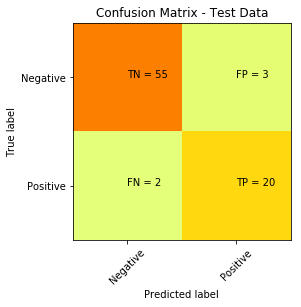

In [8]:
# let's visit our old friend the confusion matrix to see how well our model performs
# by comparing our y test data against our y predicted data
from sklearn.metrics import confusion_matrix, classification_report
cm = confusion_matrix(y_test, y_pred)

print(cm)
print(classification_report(y_test, y_pred))

# let's plot the confusion matrix
# Thanks to the following site for excellent plot code for confusion matrices: 
# http://www.tarekatwan.com/index.php/2017/12/how-to-plot-a-confusion-matrix-in-python/
#
plt.clf()
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Wistia)
classNames = ['Negative','Positive']
plt.title('Confusion Matrix - Test Data')
plt.ylabel('True label')
plt.xlabel('Predicted label')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s = [['TN','FP'], ['FN', 'TP']]
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]))
plt.show()


## Comparing the Results
At this point it's interesting to compare the model prediction results between our Decision Tree model and our Random Forest model since they used the same dataset.

The confusion matrix for our Decision Tree model provided a matrix of [[53, 5][3, 19]]. Just as a reminder, the confusion matrix is read as follows: [[True Negative, False Positive][False Negative, True Positive]]. 

The confusion matric for our Random Forest model provided a matric of [[55, 3][2, 20]]. This is an improvement in prediction accuracy for both purchases and non-purchases.


In [11]:
# so a Random Forest mode with 100 decision trees gave us better prediction accuracy for both purchase predictions 
# and non-purchase predictions. An interesting question is can we improve the prediction accuracy by increasing
# the number of decision trees used in our random forest ensemble model?

# Let's try again with a classifier parameter setting of 500 trees
# here we configure the classifier, the default for the classifier is 500 decision trees in the ensemble so
# we'll start with that. We will not limit the depth of the trees initially.
classifier_500 = RandomForestClassifier(n_estimators = 500, criterion = 'entropy', random_state = 0)
# now we'll train the model with the training set
classifier_500.fit(x_train, y_train)

print(classifier_500.feature_importances_)
print('The number of features = ', classifier_500.n_features_)
print('The number of classes = ', classifier_500.n_classes_)
print('The number of outputs = ', classifier_500.n_outputs_)

# now run the prediction
y_pred_500 = classifier_500.predict(x_test)

# now build the confusion matrix and print the results
cm = confusion_matrix(y_test, y_pred_500)

print(cm)
print(classification_report(y_test, y_pred_500))

# we'll see below that the results are slightly better than our decision tree model but slightly worse than our
# random forest model with 100 decision trees. The 500 decision tree version had worse performance at predicting
# non-purchases but the same performance at predicting purchases.

# we'll learn in later activities how we can perform model tuning to identify the optimal parameters for models
# to get the best performance.

[0.48802866 0.51197134]
The number of features =  2
The number of classes =  2
The number of outputs =  1
[[54  4]
 [ 2 20]]
              precision    recall  f1-score   support

           0       0.96      0.93      0.95        58
           1       0.83      0.91      0.87        22

   micro avg       0.93      0.93      0.93        80
   macro avg       0.90      0.92      0.91        80
weighted avg       0.93      0.93      0.93        80

